In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
test_text = df_test['text']
text = df['text']
target = df['target']

print(target)

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)
y = target
X_test_final = vectorizer.transform(test_text)

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 1)
mlp = MLPClassifier(hidden_layer_sizes=(50), activation= 'logistic',random_state = 1,solver='adam', alpha=0.0001, learning_rate='adaptive', max_iter=500).fit(X_train, y_train)

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = mlp.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)




Matriz de Confusão:
[[368  70]
 [ 99 225]]


##Instanciando os componentes para calcular as métricas

In [9]:
VP = conf_matrix[0, 0]  # Verdadeiros negativos
FN = conf_matrix[0, 1]  # Falsos positivos
FP = conf_matrix[1, 0]  # Falsos negativos
VN = conf_matrix[1, 1]  # Verdadeiros positivos

In [16]:
acuracia = (VP+VN)/(conf_matrix.sum())
print("Acurácia:", acuracia)
recall = VP/(VP+FN)
print("Recall:", recall)
especificidade = VN/(VN+FP)
print("Especificidade:", especificidade)
precisão = VP/(VP+FP)
print("Precisão:", precisão)
f1_score = (2*precisão*recall)/(precisão+recall)
print("F1 Score:", f1_score)

Acurácia: 0.7782152230971129
Recall: 0.8401826484018264
Especificidade: 0.6944444444444444
Precisão: 0.7880085653104925
F1 Score: 0.8132596685082872


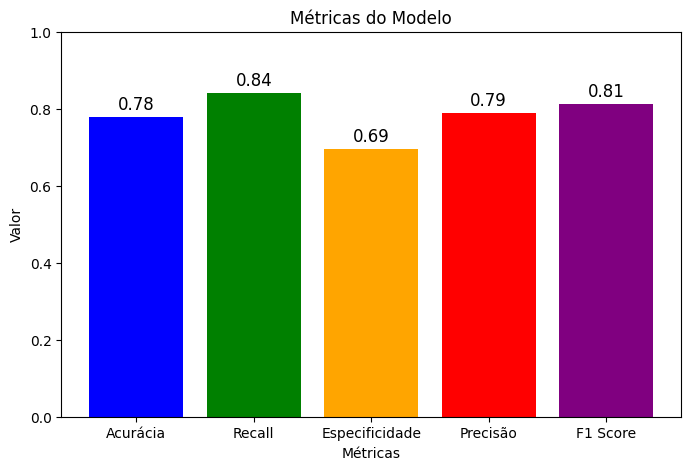

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Definição das métricas
metricas = ["Acurácia", "Recall", "Especificidade", "Precisão", "F1 Score"]
valores = [acuracia, recall, especificidade, precisão, f1_score]

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Adicionando valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)


plt.ylim(0, 1)
plt.xlabel("Métricas")
plt.ylabel("Valor")
plt.title("Métricas do Modelo")
plt.show()

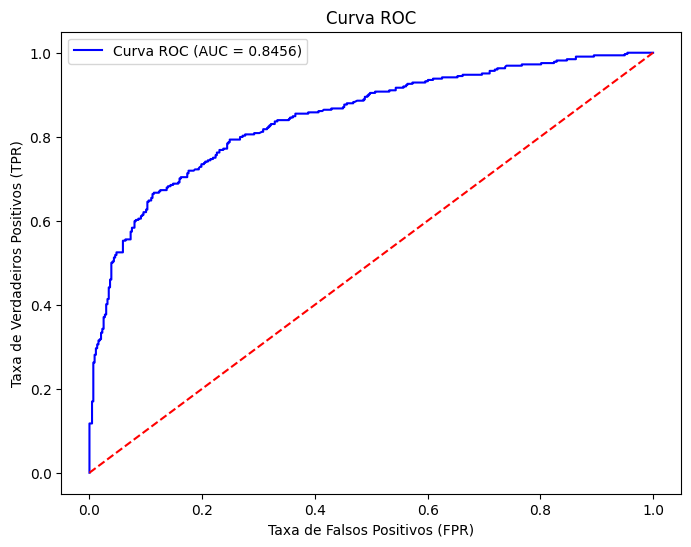

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_probs = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()